In [1]:
import numpy as np
import pandas as pd
from nVision import pca
import matplotlib.pyplot as plt

In [58]:
loc = {}

loc[0] = [2.5, 1, 0, 0.75]
loc[1] = [5, 3.5, 4, 4]
loc[2] = [2.5, 4, 4, 4]
loc[3] = [5, 1, 2, 0.5]

In [59]:
rawdata = {}
pops = 4
size = 500
rawdata = np.zeros((size*pops,5))
for i in loc:
    for j, mean in enumerate(loc[i]):
        rawdata[i*500:(i+1)*500,j] = np.random.normal(loc=mean, size=500)
        rawdata[i*500:(i+1)*500,4] = i
data = pd.DataFrame(data=rawdata)

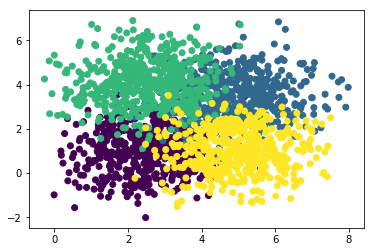

In [60]:
plt.scatter(data[0], data[1], c=data[4])

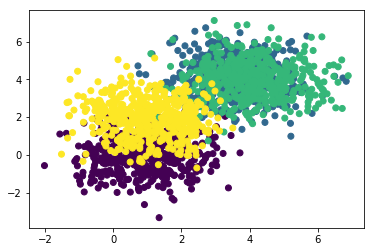

In [61]:
plt.scatter(data[1], data[2], c=data[4])

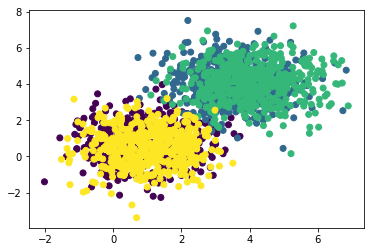

In [62]:
plt.scatter(data[1], data[3], c=data[4])

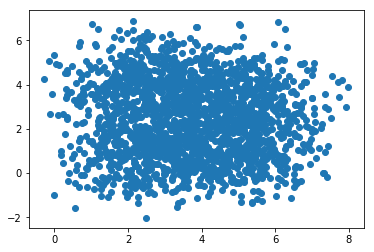

In [63]:
plt.scatter(data[0], data[1])

In [64]:
newdata, model, comps = pca.pca_analysis(data.loc[:, 0:3])

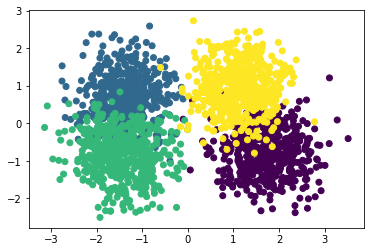

In [65]:
plt.scatter(newdata[0], newdata[1], c=data[4])

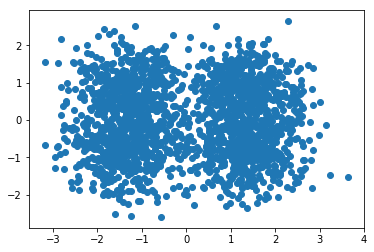

In [51]:
plt.scatter(newdata[0], newdata[1])

In [66]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [67]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=10)
k_means.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
k_means.labels_

array([3, 3, 3, ..., 1, 1, 1])

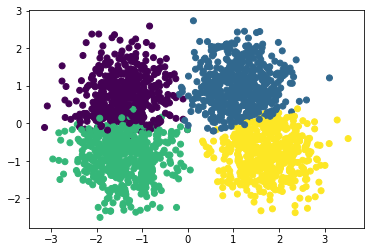

In [69]:
plt.scatter(newdata[0], newdata[1], c=k_means.labels_)

In [80]:
comps

,0,1,2,3
0,-0.613976,-0.600087,-0.395981,-0.325772
1,0.078245,-0.047576,-0.661547,0.744291
2,-0.028667,0.666139,-0.579100,-0.469126
3,-0.784913,0.440329,0.264948,0.346155


In [57]:
model.explained_variance_ratio_

array([0.54063734, 0.25185136, 0.11540694, 0.09210435])